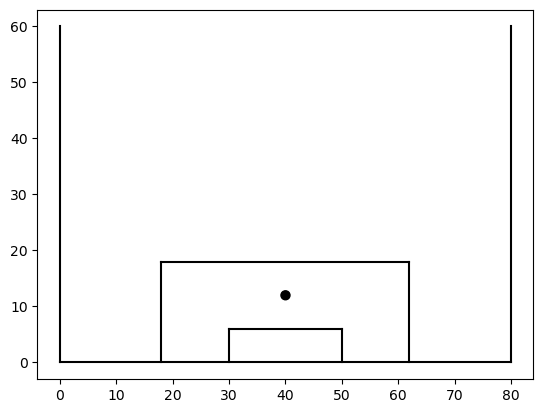

In [1]:
#The basics
import pandas as pd
import numpy as np
import json

#Xg MODEL
from expectedGoal import xG

#Plotting
import matplotlib.pyplot as plt
import FCPython 

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

from os import listdir
from os.path import isfile, join

In [2]:
#Decide which league to load
#Wyscout data from https://figshare.com/collections/Soccer_match_event_dataset/4415000/2
onlyfiles = [f[:-5] for f in listdir('wyscoutEvents/events') if isfile(join('wyscoutEvents/events', f))]
onlyfiles

['events_European_Championship',
 'events_Italy',
 'events_World_Cup',
 'events_Germany',
 'events_Spain',
 'events_France',
 'events_England']

In [3]:
data = []
for i in onlyfiles:
    with open('wyscoutEvents/events/'+i+'.json') as f:
        js = json.load(f)
        df = pd.DataFrame(js)
        data.append(df)


In [4]:
train = pd.concat(data,ignore_index=True)

In [6]:
#Create a data set of shots.
#train = pd.DataFrame(data)
#only want the shots
cross=train[train['subEventId']==80]
#create empty data frame
#shots_model=pd.DataFrame(columns=['Goal','X','Y'])


In [7]:
def P2Gangle(x,y):
    #x distance from endline to point
    #y distance from point to centrline of pitch 
    a = 11
    b = np.sqrt((x-11)**2+y**2)
    c = np.sqrt(x**2 + y**2)
    theta = np.arccos((a**2-b**2-c**2)/(-2*b*c))
    return(np.degrees(theta))

In [8]:
#only gonna look at successful crosses now
#location of orignal cross
#create empty data frame
#create empty data frame
cross=train[train['subEventId']==80]
cross_model = pd.DataFrame(columns=['Successful'])

for i,cr in cross.iterrows():
    #match id
    
    #print(x1)
    cross_model.at[i,'matchId']=cr['matchId']
    #time of event
    cross_model.at[i,'matchPeriod'] = cr['matchPeriod']
    cross_model.at[i,'Sec']=cr['eventSec']
    #sorting out start start Y coordinates
    c = abs(cr['positions'][0]['y'] - 50)
    if cr['positions'][0]['y'] < 50:
        y = cr['positions'][0]['y'] + (2*c)
    else:
        y = cr['positions'][0]['y']
    #distance from attacking goal endline
    cross_model.at[i,'X1']=100-cr['positions'][0]['x']
    cross_model.at[i,'Y1']=y
    cross_model.at[i,'C1']=c#distance from centre line
    
    #sort out end y coordinates
    y1 = cr['positions'][1]['y']
    c1 = abs(y1 - 50)
    if y1 < 50:
        
        y1 = y1 + (2*c1)
    else:
        y1 = y1
    #distance from attacking goal endline
    x1 =cr['positions'][1]['x']
    cross_model.at[i,'X2']=100-x1
    cross_model.at[i,'Y2']=y1
    cross_model.at[i,'C2']=c1
    #get xG of end location
    
    
    #distance from goal
    x=cross_model.at[i,'X1']*105/100
    y=cross_model.at[i,'C1']*65/100
        #Euciledean Distance
    cross_model.at[i,'Distance']=np.sqrt(x**2 + y**2)
    
    #angle peno spot to 6 yard box
    cross_model.at[i,'Angle'] = P2Gangle(x,y)
    
    #corner?
    cross_model.at[i,'Corner']=0
    if cr['eventId']==3:
        cross_model.at['Corner']=1
    #high or low
    cross_model.at[i,'Goal']=0
    cross_model.at[i,'Successful']=0
    cross_model.at[i,'high']=0
    cross_model.at[i,'inverted']=0
    cross_model.at[i,'xG']=0
    
    
    for tags in cr['tags']:
        if tags['id'] == 1801:
            cross_model.at[i,'Successful']=1
            
            x=100-x1#use .at to access single value, similar to .loc
        #y coordinate unchanged
            y=c1#2 dictionary within a list, keys = 'x','y'
        #to get the distance shot to the center line
          #  c=abs(cr['positions'][1]['y']-50)
            x=x*105/100
            y=y*65/100
        #Euciledean Distance
            print('yes ')
        
            s=np.sqrt(x**2 + y**2)
        #angle
            a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
            #print(s)
            #print(a)
            #print(xG(a=a,d=s))
            cross_model.at[i,'xG'] = xG(a=a,d=s)
            
        if tags['id'] == 301:
            cross_model.at[i,'Goal']=1
        
        if tags['id'] == 801:
            cross_model.at[i,'high']=1
        if tags['id'] == 802:
            cross_model.at[i,'high']=2
            #https://dataglossary.wyscout.com/pitch_coordinates/ needed to understand where is left and right flank
        if ((cr['positions'][0]['y']-50) < 0) and (tags['id'] == 402):
            cross_model.at[i,'inverted']=1
        if ((cr['positions'][0]['y']-50) > 0) and (tags['id'] == 401):
            cross_model.at[i,'inverted']=1
            
            
        

yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 
yes 


In [18]:
cross_model[cross_model['Goal']==1]

,Successful,matchId,matchPeriod,Sec,X1,Y1,C1,X2,Y2,C2,Distance,Angle,Corner,Goal,high,inverted,xG
1046,0,1694390.0,2H,714.929807,18.0,92.0,42.0,100.0,100.0,50.0,33.203915,18.555911,0.0,1.0,1.0,1.0,0.000000
3785,1,1694392.0,1H,2278.539100,4.0,69.0,19.0,11.0,56.0,6.0,13.044635,47.619693,0.0,1.0,1.0,0.0,0.176112
6192,1,1694393.0,2H,2650.660856,28.0,91.0,41.0,11.0,50.0,0.0,39.681009,13.186448,0.0,1.0,1.0,0.0,0.198157
8502,0,1694395.0,1H,2573.814662,17.0,88.0,38.0,0.0,100.0,50.0,30.474785,20.354408,0.0,1.0,1.0,0.0,0.000000
12274,1,1694397.0,2H,2773.384444,27.0,77.0,27.0,10.0,56.0,6.0,33.342540,13.568859,0.0,1.0,1.0,0.0,0.201865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237779,1,2500090.0,2H,1443.043465,5.0,71.0,21.0,8.0,55.0,5.0,14.624808,43.880547,0.0,1.0,0.0,0.0,0.279586
3238840,1,2500091.0,1H,2250.387848,9.0,65.0,15.0,3.0,52.0,2.0,13.578107,53.137796,0.0,1.0,0.0,1.0,0.037657
3240651,1,2500092.0,1H,2374.383199,13.0,90.0,40.0,9.0,51.0,1.0,29.365328,21.879807,0.0,1.0,1.0,0.0,0.268819
3249139,1,2500097.0,2H,215.593916,10.0,74.0,24.0,5.0,52.0,2.0,18.804521,35.779362,0.0,1.0,0.0,0.0,0.510947


In [23]:
#cross_model2 = cross_model[(cross_model['xG'] != 0) & (cross_model['Goal']==1)]
cross_model2 = cross_model[~((cross_model['xG'] == 0) & (cross_model['Goal']==1))]


/tmp/ipykernel_4040/2265884647.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cross_model2[(cross_model['xG'] == 0) & (cross_model['Goal']==1)]


,Successful,matchId,matchPeriod,Sec,X1,Y1,C1,X2,Y2,C2,Distance,Angle,Corner,Goal,high,inverted,xG


,Successful,matchId,matchPeriod,Sec,X1,Y1,C1,X2,Y2,C2,Distance,Angle,Corner,Goal,high,inverted,xG
3785,1,1694392.0,1H,2278.539100,4.0,69.0,19.0,11.0,56.0,6.0,13.044635,47.619693,0.0,1.0,1.0,0.0,0.176112
6192,1,1694393.0,2H,2650.660856,28.0,91.0,41.0,11.0,50.0,0.0,39.681009,13.186448,0.0,1.0,1.0,0.0,0.198157
12274,1,1694397.0,2H,2773.384444,27.0,77.0,27.0,10.0,56.0,6.0,33.342540,13.568859,0.0,1.0,1.0,0.0,0.201865
13573,1,1694398.0,2H,2075.438981,8.0,79.0,29.0,9.0,55.0,5.0,20.636921,31.872182,0.0,1.0,1.0,0.0,0.242191
21000,1,1694403.0,2H,2809.749789,8.0,87.0,37.0,4.0,60.0,10.0,25.474742,25.423071,0.0,1.0,1.0,0.0,0.268302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237779,1,2500090.0,2H,1443.043465,5.0,71.0,21.0,8.0,55.0,5.0,14.624808,43.880547,0.0,1.0,0.0,0.0,0.279586
3238840,1,2500091.0,1H,2250.387848,9.0,65.0,15.0,3.0,52.0,2.0,13.578107,53.137796,0.0,1.0,0.0,1.0,0.037657
3240651,1,2500092.0,1H,2374.383199,13.0,90.0,40.0,9.0,51.0,1.0,29.365328,21.879807,0.0,1.0,1.0,0.0,0.268819
3249139,1,2500097.0,2H,215.593916,10.0,74.0,24.0,5.0,52.0,2.0,18.804521,35.779362,0.0,1.0,0.0,0.0,0.510947


In [22]:
cross_model2[cross_model['Goal']==1]

/tmp/ipykernel_4116/1549430564.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cross_model2[cross_model['Goal']==1]


,Successful,matchId,matchPeriod,Sec,X1,Y1,C1,X2,Y2,C2,Distance,Angle,Corner,Goal,high,inverted,xG
3785,1,1694392.0,1H,2278.539100,4.0,69.0,19.0,11.0,56.0,6.0,13.044635,47.619693,0.0,1.0,1.0,0.0,0.176112
6192,1,1694393.0,2H,2650.660856,28.0,91.0,41.0,11.0,50.0,0.0,39.681009,13.186448,0.0,1.0,1.0,0.0,0.198157
12274,1,1694397.0,2H,2773.384444,27.0,77.0,27.0,10.0,56.0,6.0,33.342540,13.568859,0.0,1.0,1.0,0.0,0.201865
13573,1,1694398.0,2H,2075.438981,8.0,79.0,29.0,9.0,55.0,5.0,20.636921,31.872182,0.0,1.0,1.0,0.0,0.242191
21000,1,1694403.0,2H,2809.749789,8.0,87.0,37.0,4.0,60.0,10.0,25.474742,25.423071,0.0,1.0,1.0,0.0,0.268302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237779,1,2500090.0,2H,1443.043465,5.0,71.0,21.0,8.0,55.0,5.0,14.624808,43.880547,0.0,1.0,0.0,0.0,0.279586
3238840,1,2500091.0,1H,2250.387848,9.0,65.0,15.0,3.0,52.0,2.0,13.578107,53.137796,0.0,1.0,0.0,1.0,0.037657
3240651,1,2500092.0,1H,2374.383199,13.0,90.0,40.0,9.0,51.0,1.0,29.365328,21.879807,0.0,1.0,1.0,0.0,0.268819
3249139,1,2500097.0,2H,215.593916,10.0,74.0,24.0,5.0,52.0,2.0,18.804521,35.779362,0.0,1.0,0.0,0.0,0.510947


In [25]:
cross_model2

,Successful,matchId,matchPeriod,Sec,X1,Y1,C1,X2,Y2,C2,Distance,Angle,Corner,Goal,high,inverted,xG
135,0,1694390.0,1H,472.444635,5.0,89.0,39.0,17.0,100.0,50.0,25.887932,24.480421,0.0,0.0,1.0,0.0,0.000000
169,1,1694390.0,1H,597.062020,12.0,79.0,29.0,4.0,61.0,11.0,22.673387,28.908481,0.0,0.0,1.0,0.0,0.237249
233,0,1694390.0,1H,780.492243,13.0,70.0,20.0,19.0,76.0,26.0,18.850000,34.875513,0.0,0.0,0.0,0.0,0.000000
246,1,1694390.0,1H,812.281441,10.0,89.0,39.0,13.0,51.0,1.0,27.438522,23.629342,0.0,0.0,0.0,0.0,0.147067
279,0,1694390.0,1H,900.362734,5.0,94.0,44.0,100.0,100.0,50.0,29.077870,21.769488,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250972,0,2500098.0,2H,1482.329472,29.0,73.0,23.0,14.0,61.0,11.0,33.922043,11.397634,0.0,0.0,1.0,0.0,0.000000
3251044,1,2500098.0,2H,1809.230004,7.0,84.0,34.0,9.0,57.0,7.0,23.290180,27.774270,0.0,0.0,0.0,0.0,0.219758
3251133,1,2500098.0,2H,2079.858095,10.0,75.0,25.0,9.0,92.0,42.0,19.347157,34.631070,0.0,0.0,1.0,0.0,0.016865
3251240,0,2500098.0,2H,2642.981466,14.0,94.0,44.0,12.0,71.0,21.0,32.156648,19.831082,0.0,0.0,0.0,0.0,0.000000


In [24]:
cross_model2.to_csv('crossData.csv',sep=',')

In [10]:
cross_model['X'] = cross_model['X'].astype(float)
cross_model['Y'] = cross_model['Y'].astype(float)
cross_model.dtypes

Successful      object
X              float64
Y              float64
matchId        float64
matchPeriod     object
Sec            float64
C              float64
Distance       float64
Angle          float64
Corner         float64
Goal           float64
high           float64
inverted       float64
xG             float64
dtype: object

In [27]:
#build logistical model
#only ging to look at distance from goal first
#Make single variable model of angle
#Using logistic regression we find the optimal values of b
#This process minimizes the loglikelihood
test_model = smf.glm(formula="Goal ~ Distance" , data=cross_model, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())        
b=test_model.params

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Goal   No. Observations:                12251
Model:                            GLM   Df Residuals:                    12249
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -974.27
Date:                Tue, 25 Oct 2022   Deviance:                       1948.5
Time:                        10:45:31   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):           0.002981
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5551      0.258     -9.898      0.0

In [47]:
cross_model['Distance'].describe()

count    12251.000000
mean        27.873591
std          7.339593
min          4.669582
25%         23.036113
50%         28.272115
75%         32.919447
max         79.106337
Name: Distance, dtype: float64

In [19]:
#Show empirically how distance from goal predicts probability of successful cross
succcount_dist=np.histogram(cross_model.loc[cross_model['Successful']==1,'Distance'],bins=40,range=[4, 70])
count_dist=np.histogram(cross_model['Distance'],bins=40,range=[4, 70])
prob_succ=np.nan_to_num(np.divide(succcount_dist[0],count_dist[0]))
dis=count_dist[1]

/tmp/ipykernel_4050/360355090.py:4: RuntimeWarning: invalid value encountered in divide
  prob_succ=np.nan_to_num(np.divide(succcount_dist[0],count_dist[0]))


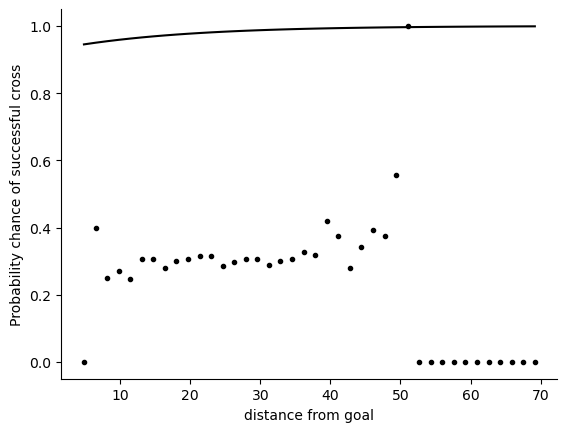

In [20]:
#ValueError: x and y must have same first dimension, but have shapes (41,) and (40,)
middis= (dis[:-1] + dis[1:])/2

#plotting the probabilty of successful using distance from goal
xCprob=1/(1+np.exp(b[0]+b[1]*middis)) 
fig,ax=plt.subplots(num=1)
ax.plot(middis, prob_succ, linestyle='none', marker= '.', color='black')
ax.plot(middis, xCprob, linestyle='solid', color='black')
ax.set_ylabel('Probability chance of successful cross')
ax.set_xlabel("distance from goal")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
#fig.savefig('Output/ProbabilityOfScoringAngleFit.pdf', dpi=None, bbox_inches="tight")   




In [74]:
cross_model.columns

Index(['Successful', 'X', 'Y', 'matchId', 'matchPeriod', 'Sec', 'C',
       'Distance', 'Angle', 'Corner', 'Goal', 'height', 'inverted'],
      dtype='object')

In [98]:
cross_model.dtypes

Successful      object
X               object
Y               object
matchId        float64
matchPeriod     object
Sec            float64
C              float64
Distance       float64
Angle          float64
Corner         float64
Goal           float64
high           float64
inverted       float64
xG             float64
dtype: object

In [35]:
model_variables = ['X','C']#,'X','C']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

In [41]:
#simple model only looking at distance and angle
#Fit the model

test_model = smf.glm(formula="Successful ~ " + model, data=cross_model, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())        
b=test_model.params

                         Generalized Linear Model Regression Results                          
Dep. Variable:     ['Successful[0]', 'Successful[1]']   No. Observations:                12251
Model:                                            GLM   Df Residuals:                    12248
Model Family:                                Binomial   Df Model:                            2
Link Function:                                  Logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -7523.5
Date:                                Tue, 25 Oct 2022   Deviance:                       15047.
Time:                                        10:52:04   Pearson chi2:                 1.23e+04
No. Iterations:                                     5   Pseudo R-squ. (CS):           0.005238
Covariance Type:                            nonrobust                                         
                 coef    std err          z      P

In [42]:
#Return xC value for more general model
#sh = row of the shots_model df
#%%capture
def calculate_xC(sh):
#sh = shots_model.iloc[1,:]
    bsum=b[0]
    for i,v in enumerate(model_variables):
        #print(sh[v])
        bsum=bsum+b[i+1]*sh[v]
    xC = 1/(1+np.exp(bsum)) 
    return xC   
#xG
#Add an xG to my dataframe
#usiong apply function, only works if input to the function is a row




In [39]:
pgoal_2d=np.zeros((65,65))

for x in range(65):
    for y in range(65):
        sh=dict()
        #a = np.arctan(7.32 *x /(x**2 + abs(y-65/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        
        #sh['Angle'] = P2Gangle(x,y)
        sh['X'] = x
        sh['C'] = y
        #sh['X'] = x
        #sh['AX'] = x*a
        #sh['X2'] = x**2
        #sh['C'] = abs(y-65/2)
        #sh['C2'] = (y-65/2)**2


sh

{'X': 64, 'C': 64}

(-3.0, 35.0)

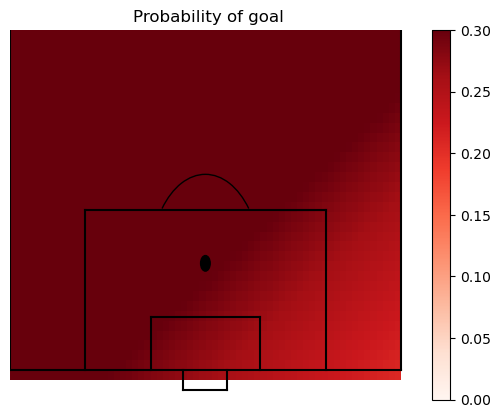

In [44]:
#Create a 2D map of xC
#therefore getting the xC for every possible position on the pitch
#create a df with the fake xs, and ys and hence angles

pgoal_2d=np.zeros((65,65))

for x in range(65):
    for y in range(65):
        sh=dict()
       # a = np.arctan(7.32 *x /(x**2 + abs(y-65/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        
        #sh['Angle'] = P2Gangle(x,y)
        sh['X'] = x
        sh['C'] = y
        #sh['X'] = x
        #sh['AX'] = x*a
        #sh['X2'] = x**2
        #sh['C'] = abs(y-65/2)
        #sh['C2'] = (y-65/2)**2
        
        pgoal_2d[x,y] =  calculate_xC(sh)

(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(pgoal_2d, extent=[-1,65,65,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of goal')
plt.xlim((0,66))
plt.ylim((-3,35))

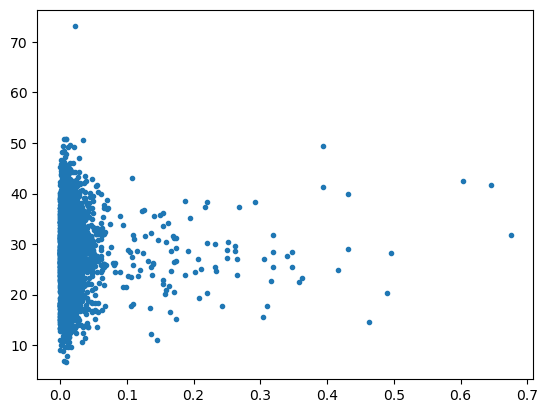

In [64]:
sdf = cross_model.loc[cross_model['Successful']==1,:]
plt.figure()
plt.plot(sdf['xG'],sdf['Distance'],'.')
#plt.axis([0.2,0.7,0,70])